# SQLBolt
En el último cuaderno de nuestro proyecto de los 30 días compartiré un pequeño curso de los fundamentos de _SQL_. Esta pequeña aproximación es un resumen en la página web _SQLBolt_, la cual está en inglés. En él explicaré las primeras lecciones del contenido de la página web.

## ¿Qué es SQL?
Significa literalmente _Structured Query Language_, es decir, lenguaje de consultas estructurado. Nos permite consultar, manipular y transformar datos de una base de datos relacional. SQL es un lenguaje estándar que se utiliza en muchas bases de datos como SQLite, Oracle, Microsoft SQL Server y otras más.

## Consulta `SELECT`
Nos referimos a estas consultas como `queries`. Es un enunciado que declara qué estamos buscando. Se trata de la consulta básica. Aquí un ejemplo de una consulta de algunas columnas en particular.

In [ ]:
SELECT column, another_column
FROM mytable;

La consulta anterior selecciona dos columnas llamadas `column` y `another_column` de la tabla `mytable`.

En _SQL_ primero se selecciona el contenido que queremos solicitar y después la tabla desde donde será obtenido. El resultado será un set de dos columnas. Una parte de la tabla.

Si queremos consultar todas las columnas de una tabla, podemos usar un asterisco: `*`.

In [ ]:
SELECT *
FROM mytable;

Con esta consulta, veremos toda la información de la tabla `mytable`.

Por convención, todas las consultas se escriben en mayúscula a diferencia de los nombres de las tablas y sus columnas, para que la consulta sea más clara y fácil de leer..

### Ejemplos
Tengo una tabla llamada `movies`. Quiero consultar el título de cada filme:

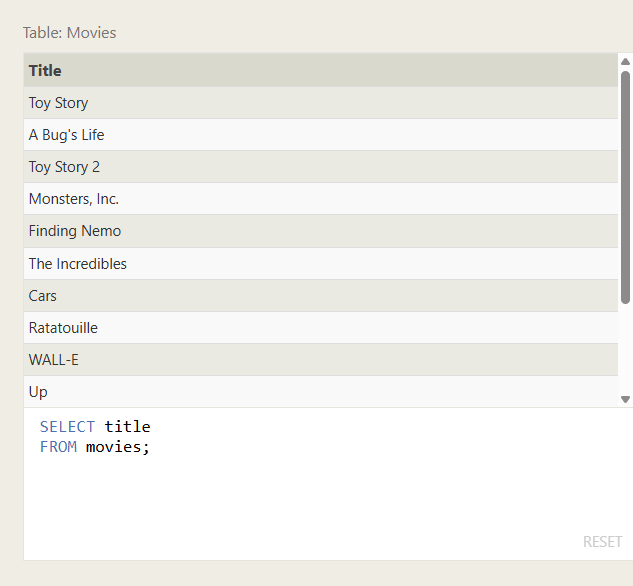

## Consultas con _constraints_ o condiciones (SQL Lesson 2: Queries with constrains)
Para filtrar los resultados que obtendremos, necesitamos usar la cláusula `WHERE` en la consulta. Aquí va su estructura:

In [ ]:
SELECT column
FROM mytable
WHERE condition
    AND/OR another_condition;

Como se puede ver, se pueden combinar múltiples condiciones. Podemos crear consultas más complejas uniéndolas con `AND` y `OR`. Abajo tenemos algunos operadores:

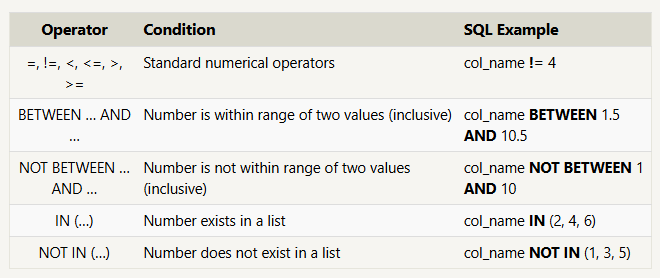

Con estas herramientas podemos hacer mejores consultas, más fáciles de entender, con los datos justos.

### Ejercicios
De nuestra tabla `movies` vamos a consultar películas estrenadas entre 2000 y 2010. Vamos a necesitar de los operadoradores `WHERE` y `AND`. Combinados, nos permiten seleccionar un rango. 

In [ ]:
SELECT * FROM movies
WHERE year BETWEEN 2000 and 2010;

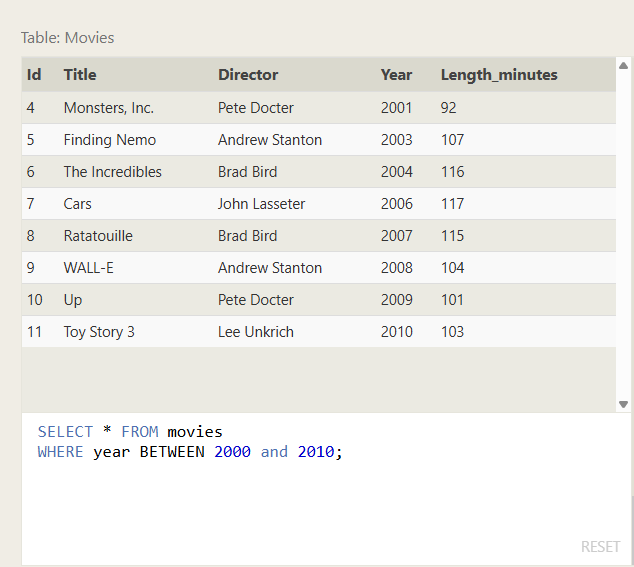

Si quisiéramos seleccionar las películas __no__ estrenadas entre 2000 y 2010 podemos añadir el operador `NOT`. Entonces estaremos combinando tres operadores: `NOT`, `BETWEEN`, `AND`:

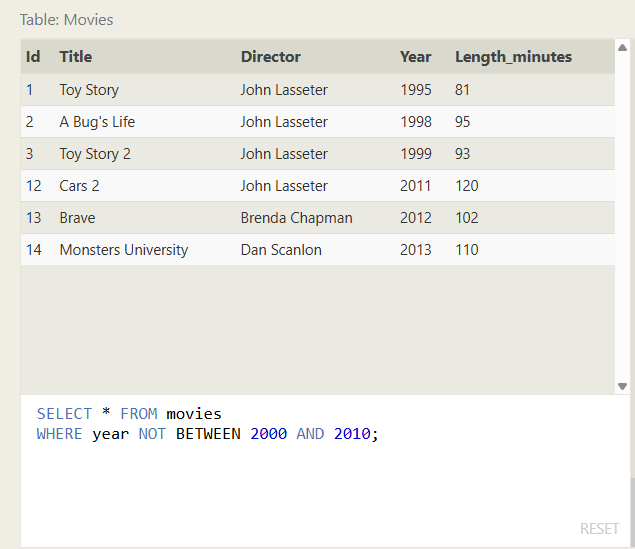

Si tuviéramos la tarea de seleccionar las primeras cinco películas de nuestra tabla, podríamos hacerlo así:

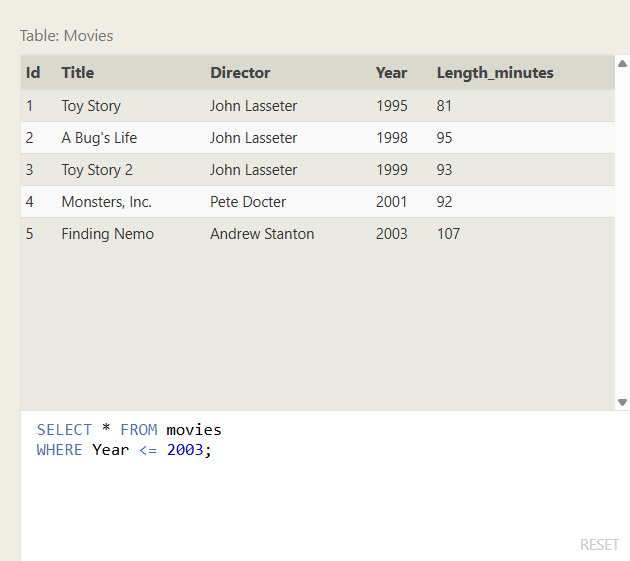

Pero lo interesante de _SQL_ es que hay más de una forma de hacer las consultas que deseamos. En este lenguaje la creatividad se pone a prueba. El objetivo es hacer consultas de manera ordenada y eficiente, con la menor cantidad de líneas posible. Por ejemplo, la última consulta de puede resolver de esta otra forma:

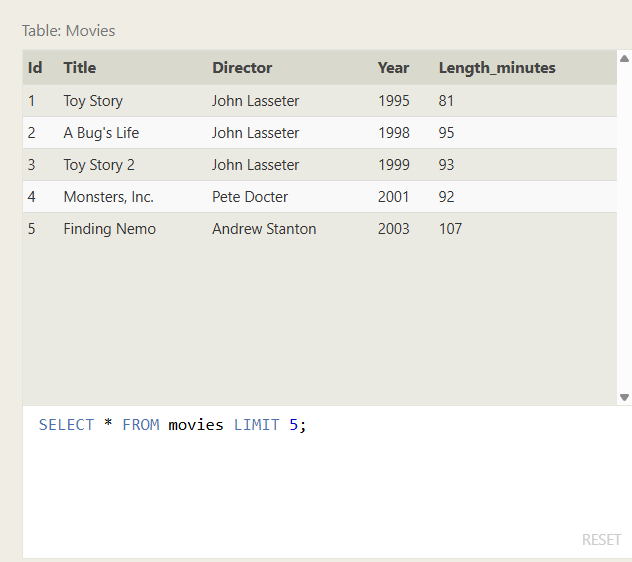

A continuación consultas adicionales como práctica:

In [ ]:
# Ejercicio 1: Mostrar título y director de todas las películas
SELECT Title, Director
FROM movies;

# Ejercicio 2: Mostrar todas las columnas de películas del año 2000 o posteriores
SELECT *
FROM movies
WHERE Year >= 2000;

# Ejercicio 3: Mostrar título y año de películas dirigidas por John Lasseter
SELECT Title, Year
FROM movies
WHERE Director = 'John Lasseter';

# Ejercicio 4: Mostrar títulos de películas con duración menor a 100 minutos
SELECT Title
FROM movies
WHERE Length_minutes < 100;

# Ejercicio 5: Mostrar todas las columnas de películas del 1999 o antes y con duración mayor a 90 minutos
SELECT *
FROM movies
WHERE Year <= 1999
AND Length_minutes > 90;


## Consultas con condiciones (SQL Lesson 3: Queries with constrains[Pt. 2])
Cuando usamos la cláusula `WHERE` con columnas que contiene texto, SQL cuenta con muchos operadores útiles para comparar patrones. Éstos son algunos de ellos:

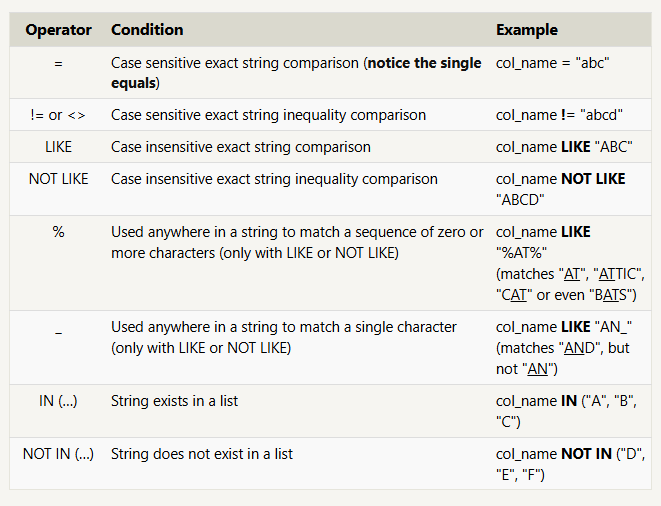

Todos las cadenas de texto (_strings_) se deben colocar entre comillas para distinguirlas de las palabras reservadas de _SQL_.

Ésta es la estructura de una consulta usando la cláusula `WHERE`:

In [ ]:
SELECT column, another_column, …
FROM mytable
WHERE condition
    AND/OR another_condition
    AND/OR …;

### Ejercicios
¿Cómo podríamos encontrar todas las películas de Toy Story?

Necesitamos de algunos de nuestros operadores de texto. Veamos la consulta:

In [ ]:
SELECT * FROM movies
WHERE Title LIKE '%Toy Story%';

Pude haber escrito `SELECT * FROM movies WHERE Title LIKE 'Toy Story'`, pero eso sólo me hubiera arrojado los resultados en que el _string_ sea exactamente igual. Al añadir `%` uno puede acceder a todos los resultados que contengan esa parte en su _string_; el operador `%` solamente puede ser utilizado con `LIKE` o `NOT LIKE`. 

Con el operador `LIKE` no importa si estamos usando mayúsculas o minúsculas.

Si queremos encontrar una cadena de texto exacta y sensible a minúsculas y mayúsculas, podemos utilizar `=`. Por ejemplo:

In [ ]:
SELECT * FROM movies
WHERE Director = 'John Lasseter';

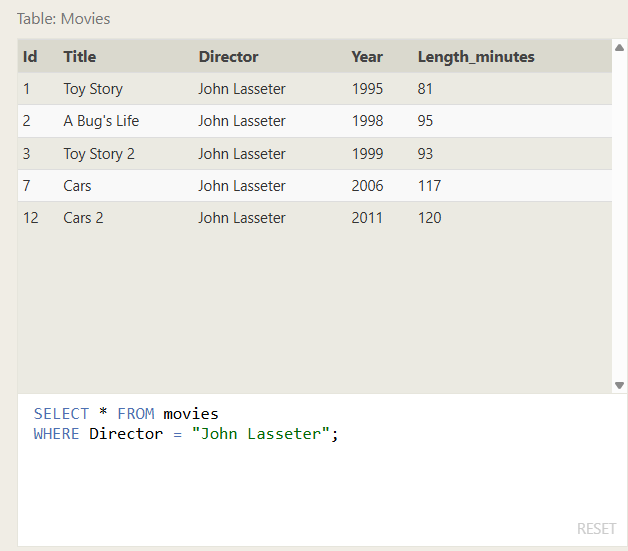

Otro ejemplos parecido a los que hemos visto. Se pueden encontrar patrones de texto, como el patrón __WALL-__ usando `'%WALL-%'`.

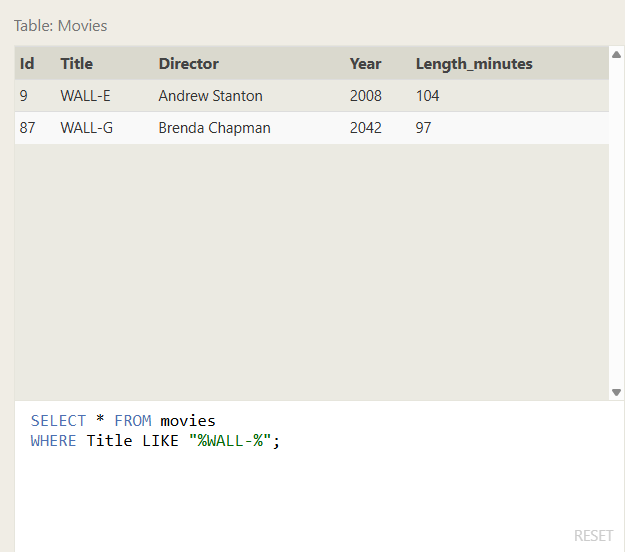

Pero hay más formas de resolverlo:

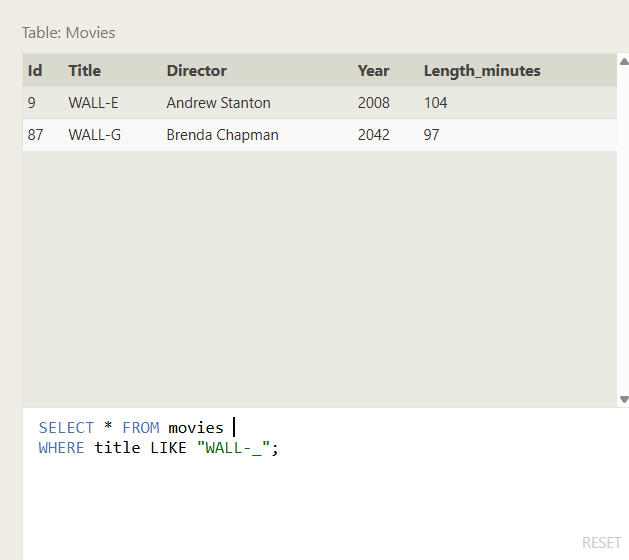

Con el operador `_` podemos hacer _match_ con cualquier otro caracter que esté en su lugar. 

## Filtrar y acomodar resultados de consultas (SQL Lesson 4: Filtering and sorting Query results)
Si bien los datos en una base pueden ser únicos, los resultados de alguna consulta en particular podrían no serlo. Por ejemplo, en nuestra tabla `movies` podría haber muchas películas lanzadas el mismo año. Para estos casos, _SQL_ tiene una cláusula que nos permite descartar filas duplicadas: la cláusula `DISTINCT`. Éste es la estructura de una consulta con resultado únicos:

In [ ]:
SELECT DISTINCT column, another_column
FROM mytable
WHERE condition(s);

Más adelante aprenderemos a filtrar duplicados basados en columnas usando la cláusula `GROUP BY`.

### Ordenar resultados
Las bases de datos reales a las que te enfrentarás en pueden no tener ningún tipo de orden. Para ordenarlas usamos la cláusula `ORDER BY`:

In [ ]:
SELECT columns
FROM table
WHERE condition(s)
ORDER BY column ASC/DESC;

Con `ORDER BY` cada fila es organizada de forma alfanumérica.

### Limitar resultados a subconjuntos
Otras cláusulas que se usan junto a `ORDER BY` son `LIMIT` y `OFFSET`. Con ellas podemos indicar de forma precisa un subconjunto de datos.

`LIMIT` indica el número filas de la consulta y `OFFSET` especifica desde qué fila empezamos a contar. Aquí un ejemplo de su estructura:

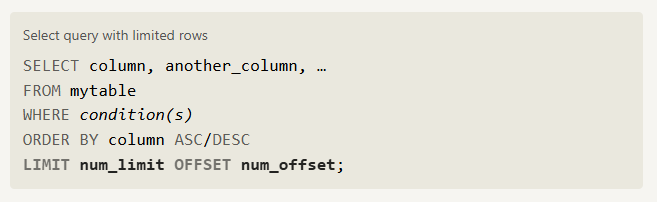

In [ ]:
# Escribamos la consulta, que es así como se aprende.
SELECT column, another_column
FROM mytable
WHERE condition(s)
ORDER BY column ASC/DESC
LIMIT num_limit OFFSET num_offset;

Piensa en _Reddit_. La página principal es una lista de _links_ organizados por popularidad y tiempo. Se trata de subconjuntos. Con estas cláusulas, una base de datos puede ejecutar consultas más rápido al devolver sólo el contenido solicitado.

Las cláusulas `LIMIT` y `OFFSET` generalmente se utilizan después de que las demás consultas han sido aplicadas. Profundizaremos sobre esto después.

### Ejercicios
Lista a los directores de las películas de Pixar alfabéticamente sin duplicados:
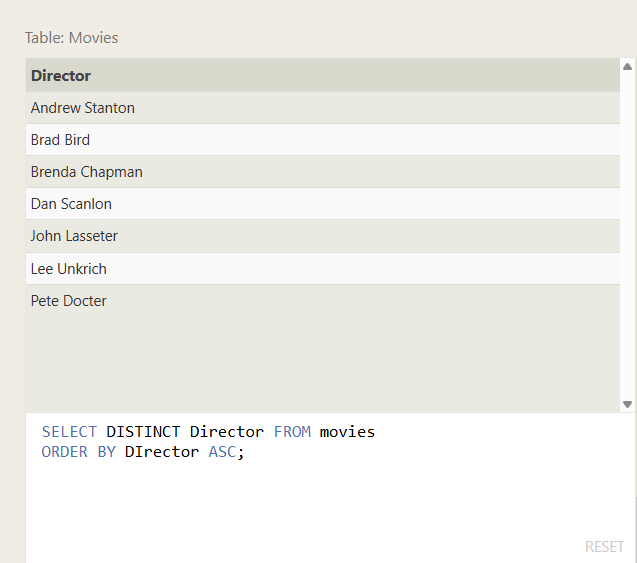

In [ ]:
# Sí, a escribir de nuevo la consulta para hacerla nuestra.
SELECT DISTINCT Director FROM movies
ORDER BY Director ASC;

Lista las cuatro últimas películas ordenadas de más reciente a menos reciente:
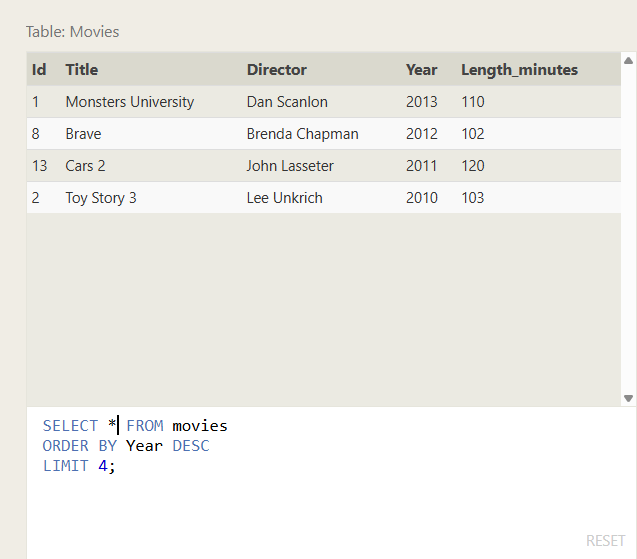

In [ ]:
#Oh, shit. Here we go again.
SELECT * FROM movies
ORDER BY year DESC
LIMIT 4;

Lista las cinco primeras películas de Pixar de forma alfabética:
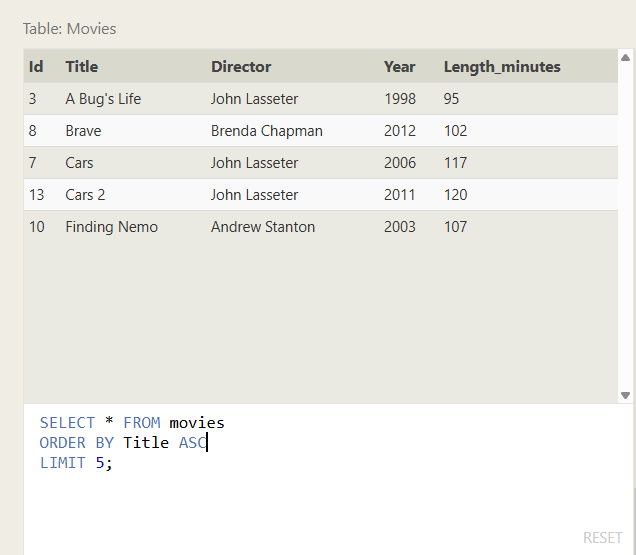

In [ ]:
SELECT * FROM movies
ORDER BY Title ASC
LIMIT 5;

Lista las siguientes cinco películas alfabéticamente:
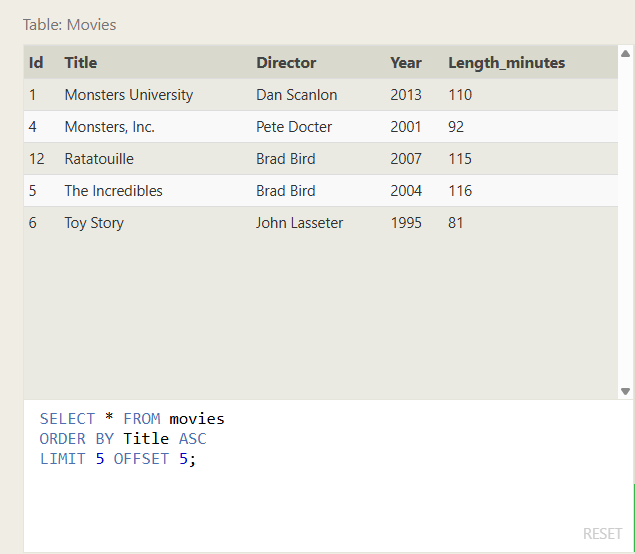

In [ ]:
SELECT * FROM movies
ORDER BY Title ASC
LIMIT 5 OFFSET 5;

## Práctica de los conceptos (SQL Review: Simple SELECT Queries)
Recordemos las estructura que general que hemos trabajado a través de múltiples consultas y cláusulas.

In [ ]:
SELECT column, another_column
FROM mytable
WHERE condition(s)
ORDER BY Column ASC/DESC
LIMIT num_limit OFFSET num_offset

### Ejercicios
Lista la tercera y cuarta ciudades más grandes según población.

Éste sería el resultado de la consulta: 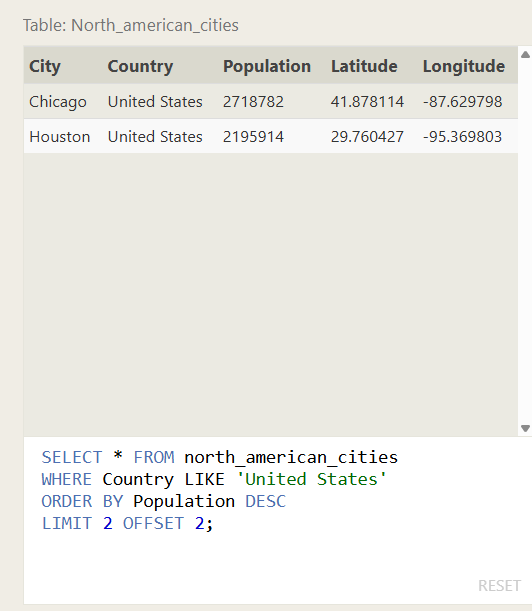

In [ ]:
SELECT * north_american_cites
WHERE Country LIKE 'United States'
ORDER BY Population DESC
LIMIT 2 OFFSET 2.

Lista todas las ciudades canadienses y su población:
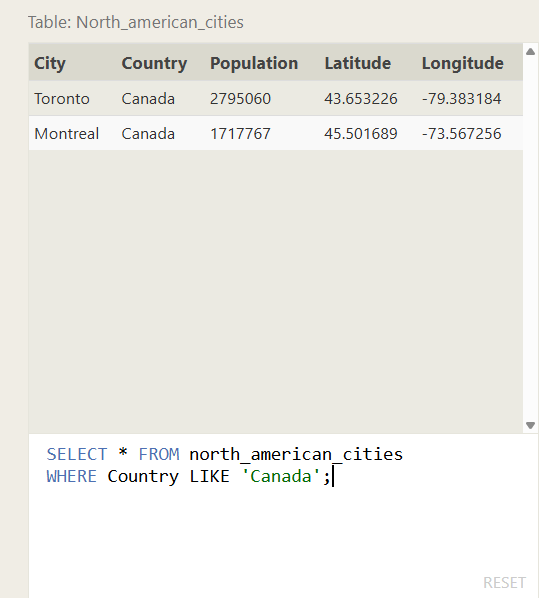

In [ ]:
SELECT * FROM north_american_cities
WHERE Country LIKE 'Canada';

Ordena todas las ciudades de Estados Unidos por latitud, de norte a sur:
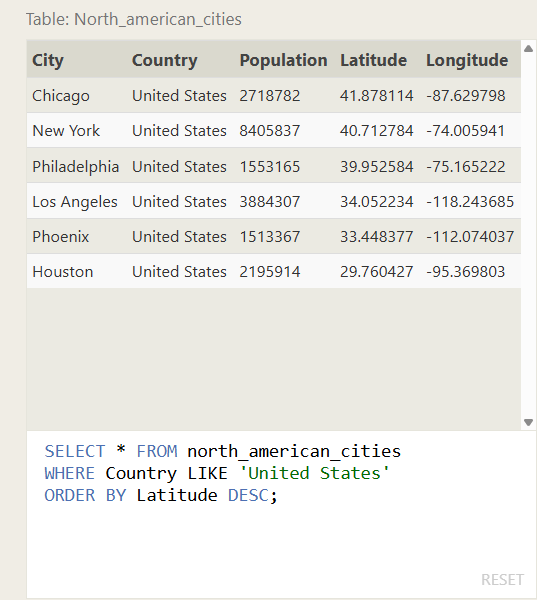

In [ ]:
SELECT * FROM north_american_cities
WHERE Country LIKE 'United States'
ORDER BY Latitude DESC;

Lista todas las ciudades al oeste de Chicago, ordenandas de oeste a este:
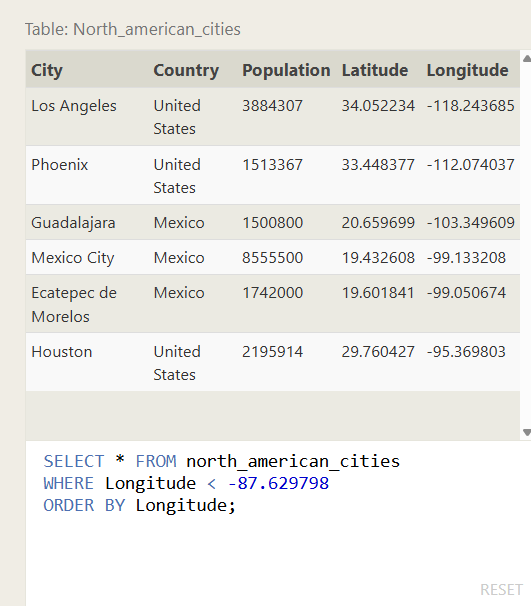

SELECT * FROM north_american_cities
WHERE Longitude < - 87.629798
ORDER BY Longitude; 

Lista las dos ciudades de mayor población en México:
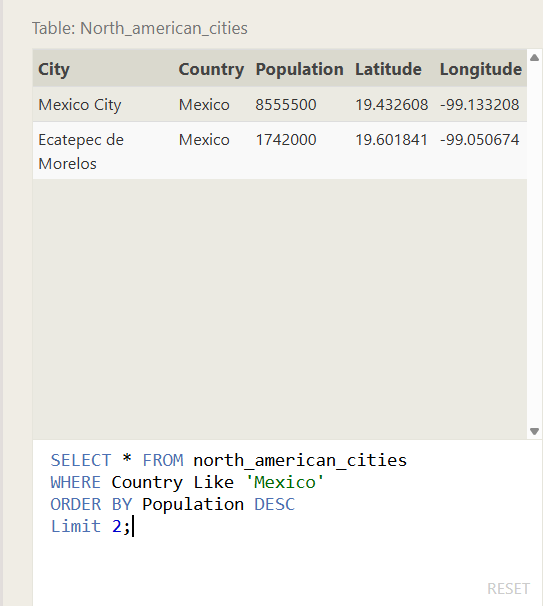

In [ ]:
SELECT * FROM north_american_cities
WHERE Country LIKE 'Mexico'
ORDER BY Population DESC
LIMIT 2;

## Despedida
Así que esto ha sido todo. Mucho aprendizaje, retos, estrés y programación constante, así es la vida dentro del mundo de los datos. 

Los proyectos en general tienen una clara tendencia didáctica. Cuando uno explica, también aprende, ¿no es cierto? Cualquier lector podrá aprender conceptos fundamentales del análisis de datos y descargarlos para correrlos a nivel local. Además así pude comprobar mis conocimientos, aprender más y compartir un poco.

_See ya!_